<a href="https://colab.research.google.com/github/HChandeepa/Sri_Lanka_Food_Prices_Analysis/blob/Master/Sri_Lanka_Food_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# from google.colab import drive, files
# drive.mount('/content/drive')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka.csv')

In [27]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [28]:
df.describe()

,latitude,longitude,price,usdprice
count,18377.000000,18377.000000,18506.000000,18506.000000
mean,7.481010,80.568017,581.991651,1.953836
std,0.947683,0.533244,606.396366,1.920414
min,5.952000,79.831700,11.500000,0.060200
25%,6.906044,80.045803,150.000000,0.655825
50%,7.253400,80.515701,320.120000,1.043450
75%,8.038129,81.005890,883.207500,2.930650
max,9.656700,81.700000,3735.420000,11.945700


In [29]:
df.isnull().sum()

,0
date,0
admin1,129
admin2,129
market,0
latitude,129
longitude,129
category,0
commodity,0
unit,0
priceflag,0


In [30]:
df.dropna(subset=['admin1', 'admin2', 'latitude', 'longitude'], inplace=True)

In [31]:
df.isnull().sum()

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


In [32]:
df.dtypes

,0
date,object
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [33]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')

In [34]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [35]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [36]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
0,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725,2004,1
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718,2004,2
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738,2004,3
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4


In [37]:
df['commodity'].unique()

array(['Wheat flour', 'Rice (red nadu)', 'Rice (white)', 'Sugar',
       'Rice (long grain)', 'Fuel (diesel)', 'Fuel (petrol-gasoline)',
       'Potatoes (imported)', 'Potatoes (local)', 'Chili (red, dry raw)',
       'Beans', 'Carrots', 'Coconut', 'Eggplants', 'Onions (red, local)',
       'Pumpkin', 'Snake gourd', 'Rice (medium grain)', 'Rice (red)',
       'Fish (dry, katta)', 'Fish (dry, sprats)', 'Lentils', 'Bananas',
       'Cabbage', 'Onions (imported)', 'Onions (red, imported)',
       'Pineapples', 'Fish (goldstripe sardinella)', 'Fish (jack)',
       'Fish (sail fish)', 'Fish (skipjack tuna)',
       'Fish (trenched sardinella)', 'Fish (yellowfin tuna)', 'Tomatoes',
       'Eggs', 'Papaya', 'Oil (coconut)', 'Onions (red)',
       'Meat (chicken, fresh)', 'Cowpeas (whole, average)',
       'Meat (chicken, broiler)', 'Beans (mung)'], dtype=object)

In [38]:
df['admin1'].unique()

array(['Western', 'Eastern', 'Northern', 'Central', 'North Central',
       'North Western', 'Sabaragamuwa', 'Southern', 'Uva'], dtype=object)

In [39]:
df['admin2'].unique()

array(['Colombo', 'Ampara', 'Batticaloa', 'Trincomalee', 'Jaffna',
       'Kilinochchi', 'Mannar', 'Mullattivu', 'Vavuniya', 'Kandy',
       'Matale', 'Nuwara Eliya', 'Anuradhapura', 'Polonnaruwa',
       'Kurunegala', 'Puttalam', 'Ratnapura', 'Galle', 'Hambantota',
       'Matara', 'Badulla', 'Moneragala', 'Gampaha', 'Kalutara',
       'Kegalle'], dtype=object)

In [40]:
df['market'].unique()

array(['Colombo City', 'Ampara', 'Batticaloa', 'Trincomalee', 'Jaffna',
       'Kilinochchi', 'Mannar', 'Mulaitivu', 'Vavuniya', 'Kandy',
       'Matale', 'Nuwara Eliya', 'Anuradhapura', 'Polonnaruwa',
       'Kurunegala', 'Puttalam', 'Rathnapura', 'Galle', 'Hambantota',
       'Matara', 'Badulla', 'Monaragala', 'Gampaha', 'Kalutara',
       'Kegalle', 'Economic Centre-Dambulla', 'Economic Centre-Pettah',
       'Economic Centre-Maradagahamula', 'Fish market-Negombo',
       'Fish market-Peliyagoda', 'Economic Centre - Peliyagoda',
       'Hanguranketha', 'Dehiattakandiya', 'Galenbindunuwewa',
       'Thambuttegama', 'Nikaweratiya', 'Mullativu', 'Embilipitiya',
       'Tissamaharama', 'Bandarawela', 'Keppetipola (DEC}', 'Dammbagalla',
       'Meegoda(DEC)'], dtype=object)

In [41]:
df.rename(columns={'admin1': 'province', 'admin2': 'district'}, inplace=True)

In [42]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
0,2004-01-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725,2004,1
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
2,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718,2004,2
3,2004-03-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738,2004,3
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4


In [46]:
df['category'].unique()

array(['cereals and tubers', 'miscellaneous food', 'non-food',
       'pulses and nuts', 'vegetables and fruits', 'meat, fish and eggs',
       'oil and fats'], dtype=object)

In [48]:
df['priceflag'].unique()

array(['actual'], dtype=object)

In [49]:
df['pricetype'].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [50]:
df['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

In [47]:
df['unit'].unique()

array(['KG', 'L', 'Unit', '750 ML'], dtype=object)

In [43]:
df_grouped = df.groupby(['year', 'commodity'])['price'].mean().reset_index()
print(df_grouped.head())

   year        commodity      price
0  2004  Rice (red nadu)  43.831333
1  2004      Wheat flour  43.534000
2  2005  Rice (red nadu)  33.355714
3  2005      Wheat flour  30.298000
4  2006  Rice (red nadu)  31.629077


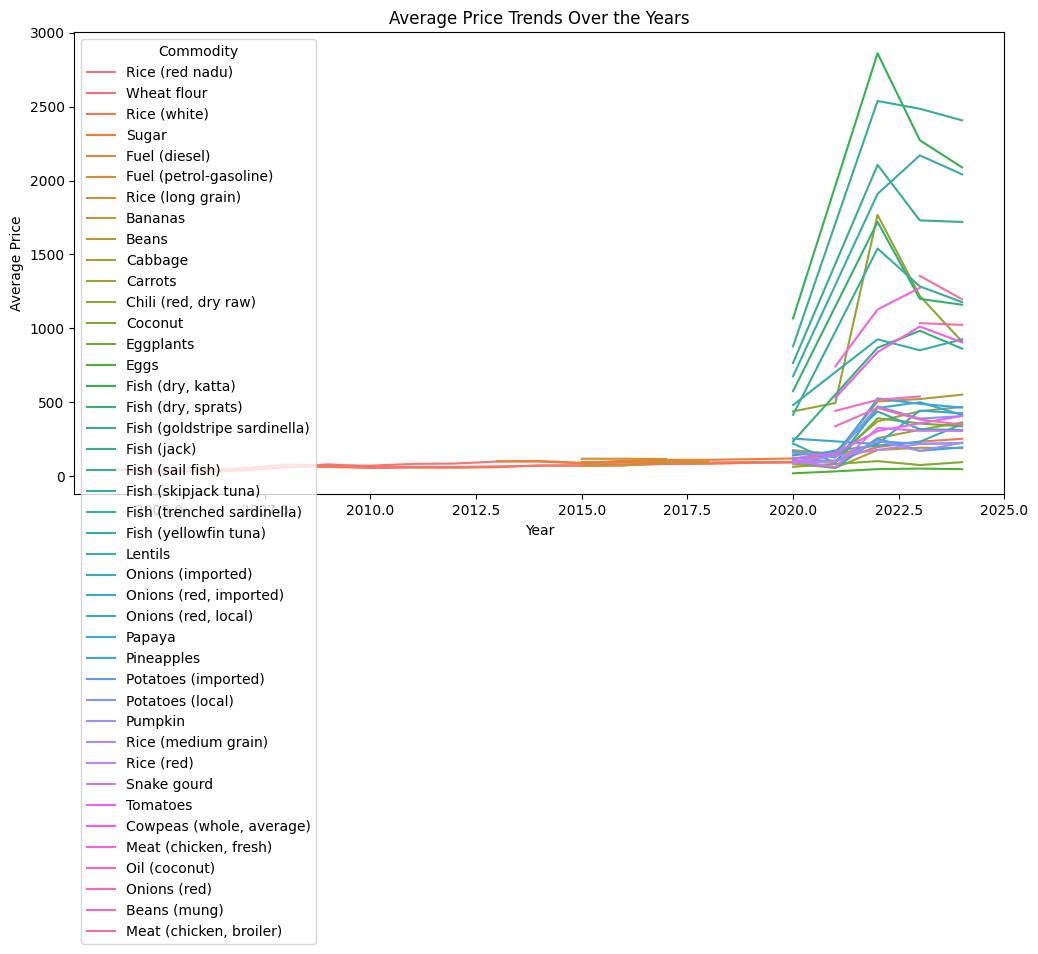

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='year', y='price', hue='commodity')
plt.title('Average Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Commodity')
plt.show()

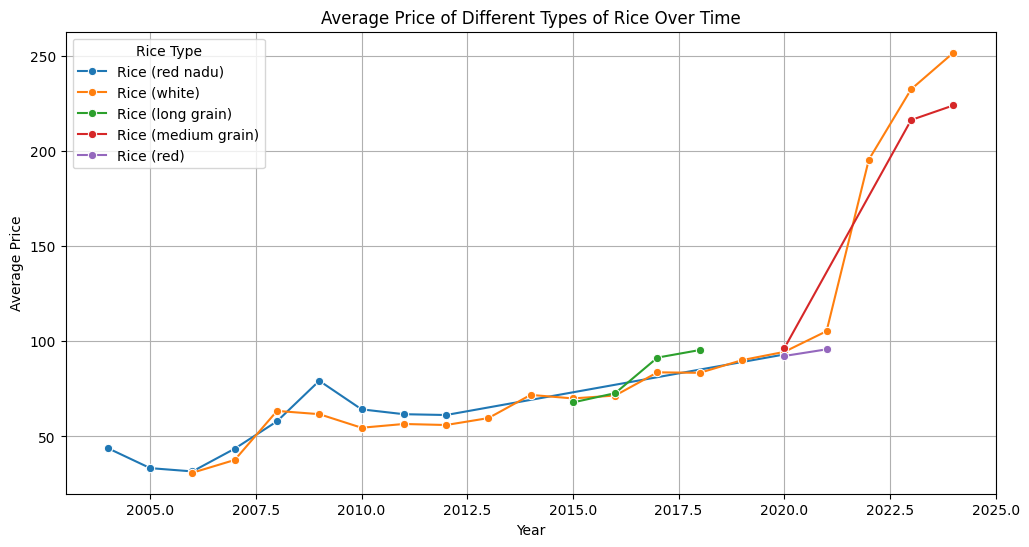

In [45]:
# Filter rice commodities
rice_types = df[df['commodity'].str.contains('Rice', case=False, na=False)]

# Group by year and commodity, then calculate the mean price
rice_prices = rice_types.groupby(['year', 'commodity'])['price'].mean().reset_index()

# Plot rice price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_prices, x='year', y='price', hue='commodity', marker='o')
plt.title('Average Price of Different Types of Rice Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Rice Type')
plt.grid(True)
plt.show()